In [30]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd
from SVI import OptSVI1test
from mpl_toolkits.mplot3d import Axes3D
import os
from scipy import optimize

In [31]:
def workdays(start,end):
    '''
    计算两个日期间的工作日
    start:开始时间
    end:结束时间
    '''
    from datetime import datetime,timedelta
    from chinese_calendar import is_workday
     # 字符串格式日期的处理
    if type(start) == str:
        start = datetime.strptime(start,'%Y%m%d').date()
    if type(end) == str:
        end = datetime.strptime(end,'%Y%m%d').date()
    # 开始日期大，颠倒开始日期和结束日期
    if start > end:
        start,end = end,start
    counts = 0
    while True:
        if start > end:
            break
        if is_workday(start):
            counts += 1
        start += timedelta(days=1)
    return counts


In [21]:
os.chdir(r'C:\Users\Ellen\Desktop\课内\研二下\stochasitc\project\波动率数据')

In [22]:
pricecsi300 = pd.read_excel(r".\指数行情序列.xlsx")
pricecsi300

,Unnamed: 0,收盘价_x000D_\n[单位] 元,开盘价_x000D_\n[单位] 元,最高价_x000D_\n[单位] 元,最高价_x000D_\n[单位] 元.1,结算价_x000D_\n[单位] 元
0,时间,沪深300,沪深300,沪深300,沪深300,沪深300
1,2023-01-03 00:00:00,3887.8992,3864.8356,3893.9904,3893.9904,NaN
2,2023-01-04 00:00:00,3892.9477,3886.2504,3905.9032,3905.9032,NaN
3,2023-01-05 00:00:00,3968.5782,3913.4928,3974.875,3974.875,NaN
4,2023-01-06 00:00:00,3980.8888,3969.5493,4000.4143,4000.4143,NaN
...,...,...,...,...,...,...
306,2024-04-10 00:00:00,3504.7086,3528.9679,3531.2295,3531.2295,NaN
307,2024-04-11 00:00:00,3504.2447,3485.0294,3520.5893,3520.5893,NaN
308,2024-04-12 00:00:00,3475.8389,3505.7499,3516.6988,3516.6988,NaN
309,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
dirs = os.listdir('./')
dirs = [i for i in dirs if  (('_buy' in i) or ('_sell' in i))]

In [24]:
K

array([2900.0, 2950.0, 3000.0, 3050.0, 3100.0, 3150.0, 3200.0, 3250.0,
       3300.0, 3350.0, 3400.0, 3450.0, 3500.0, 3550.0, 3600.0, 3650.0,
       3700.0, 3750.0, 3800.0, 3850.0, 3900.0, 3950.0, 4000.0, 4100.0,
       4200.0, 4300.0, 4400.0, 4500.0, 4600.0], dtype=object)

In [25]:
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,到期,到期日,合成期货,2900.00,2950.00,3000.00,3050.00,3100.00,3150.00,3200.00,...,3850.00,3900.00,3950.00,4000.00,4100.00,4200.00,4300.00,4400.00,4500.00,4600.00
1,1M,20240128,3444.363,24.04,22.96,21.89,20.77,19.61,18.35,17.18,...,21.90,23.02,24.21,25.26,27.37,29.48,31.59,33.69,35.80,37.91
2,2M,20240228,3457.701,22.07,21.16,20.26,19.39,18.55,17.91,17.33,...,20.46,20.98,21.79,22.59,23.93,25.54,26.73,28.03,29.62,31.21
3,3M,20240328,3464.046,21.50,20.67,19.83,19.12,18.54,17.86,17.35,...,19.93,20.43,21.17,21.90,22.98,24.45,25.34,26.46,27.92,29.39
4,6M,20240628,3469.154,19.15,18.66,18.16,17.84,17.53,17.25,16.97,...,17.91,18.28,18.73,19.19,19.99,20.85,21.72,22.89,23.90,24.90
5,9M,20240928,3464.497,18.55,18.27,17.99,17.77,17.55,17.32,17.09,...,17.21,17.44,17.70,17.97,18.26,18.76,19.25,19.74,20.24,20.73
6,1Y,20241228,3486.69,17.98,17.83,17.68,17.50,17.32,17.15,16.99,...,16.36,16.18,16.00,15.81,15.45,15.09,14.73,14.37,14.00,13.64


In [26]:
S0

3486.69

<ipython-input-27-69745a77184e>:41: RuntimeWarning: invalid value encountered in sqrt
  f = lambda x: np.sqrt(np.maximum(p[i, 0] + p[i, 1] * (p[i, 2] * (x - p[i, 3]) + np.sqrt((x - p[i, 3]) ** 2 + p[i, 4])), 0)) / np.sqrt(TT[i] / 365)


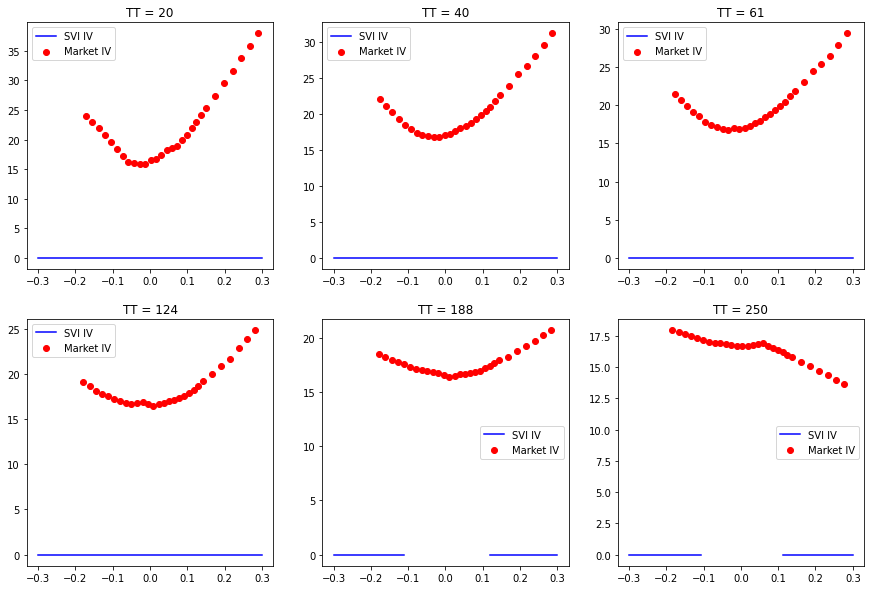

In [27]:
from scipy.optimize import differential_evolution, basinhopping
p_final =  np.ones((6, 5)) * 0.0
sim_num = 1
for s in range(sim_num):
    sub = '20231229_sell'
    data = pd.read_excel(f'./{sub}/波动率曲面.xlsx')
    dataarr = data.values
    S = dataarr[1: ,2]
    K = dataarr[0,3:] #行权价格
    TT = [workdays('20231229',i) for i in data.iloc[1:, 1]]
    S = dataarr[1: ,2]

    w = np.ones((6, dataarr.shape[1] -3))  # weights for each option, ????weight是啥意思，相当于给每个行权价格的重要性权重
    Vol = np.array(dataarr[1:,3:])#相当于初始的波动率
    p = np.ones((6, 5)) * 0.0 # initial guess for SVI parameters
    p[4:,:] = 0.003#这里为啥要把4行之后的赋值为0.003???????????
    for i in range(6):
        S0 = S[i]
        fun = lambda p: OptSVI1test(i, Vol, w, p, K, S0, TT)
        #(func=fun_nonconvex, x0=0, niter=1000
        res = basinhopping(fun, p[i,:],niter=1000)
        #res = minimize(fun, p[i,:], options={'maxiter': 100000})
        #res = optimize.shgo(fun, [(-5e3, 5e3) for i in range(5)])
        p[i,:] = res.x
    p_final += p
    
    
p_final = p_final/sim_num

p = p_final.copy()

fig, ax = plt.subplots(2, 3, figsize=(15, 10))  # 创建一个2x3的子图网格
for i in range(6):
    S0 =  S[i]
    f = lambda x: np.sqrt(np.maximum(p[i, 0] + p[i, 1] * (p[i, 2] * (x - p[i, 3]) + np.sqrt((x - p[i, 3]) ** 2 + p[i, 4])), 0)) / np.sqrt(TT[i] / 365)
    x = np.linspace(-0.3, 0.3, 100)
    ax[i//3, i%3].plot(x, f(x),label = 'SVI IV', color='b')  # 选择子图
    ImpVol = Vol[i,:]
    x = np.array(K / S0).astype(float)
    ax[i//3, i%3].scatter(np.log(x), ImpVol,label='Market IV',color='r')
    ax[i//3, i%3].set_title('TT = %d' % TT[i])
    ax[i//3, i%3].legend()


plt.show()
fig.savefig(f'subplot_{sub}.jpg')  # 保存整个子图网格为一个jpg文件

[[ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [-0.99915807 -0.1217021   0.00290961  0.00341739 -0.01211308]
 [-0.99879845 -0.12459274  0.00290987  0.00340684 -0.01182544]]


<ipython-input-32-333eee7aeec9>:32: RuntimeWarning: invalid value encountered in sqrt
  f = lambda x: np.sqrt(np.maximum(p[i, 0] + p[i, 1] * (p[i, 2] * (x - p[i, 3]) + np.sqrt((x - p[i, 3]) ** 2 + p[i, 4])), 0)) / np.sqrt(TT[i] / 365)


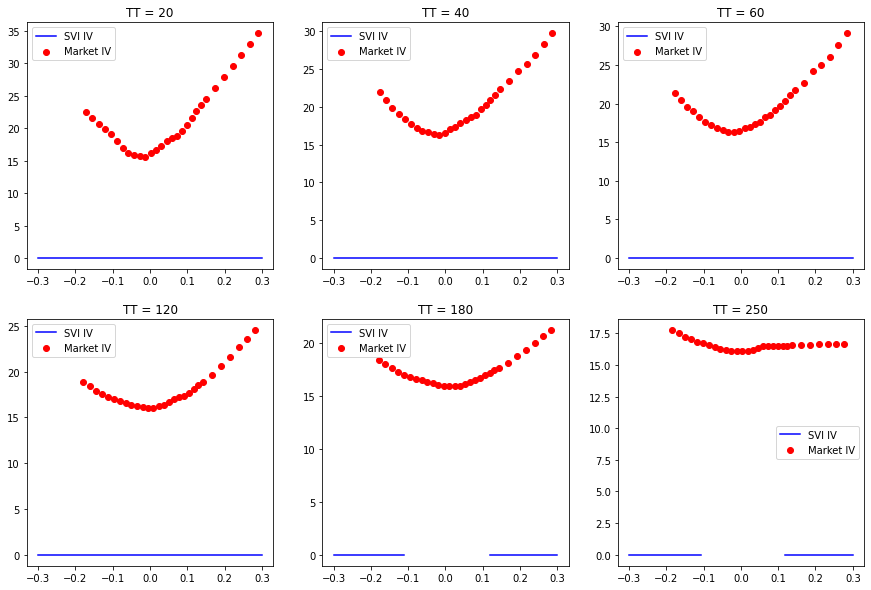

[[ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [-0.99904034 -0.12265592  0.0029055   0.00343747 -0.01201842]
 [-0.99832038 -0.12832844  0.0028882   0.00350925 -0.01149363]]


<ipython-input-32-333eee7aeec9>:32: RuntimeWarning: invalid value encountered in sqrt
  f = lambda x: np.sqrt(np.maximum(p[i, 0] + p[i, 1] * (p[i, 2] * (x - p[i, 3]) + np.sqrt((x - p[i, 3]) ** 2 + p[i, 4])), 0)) / np.sqrt(TT[i] / 365)


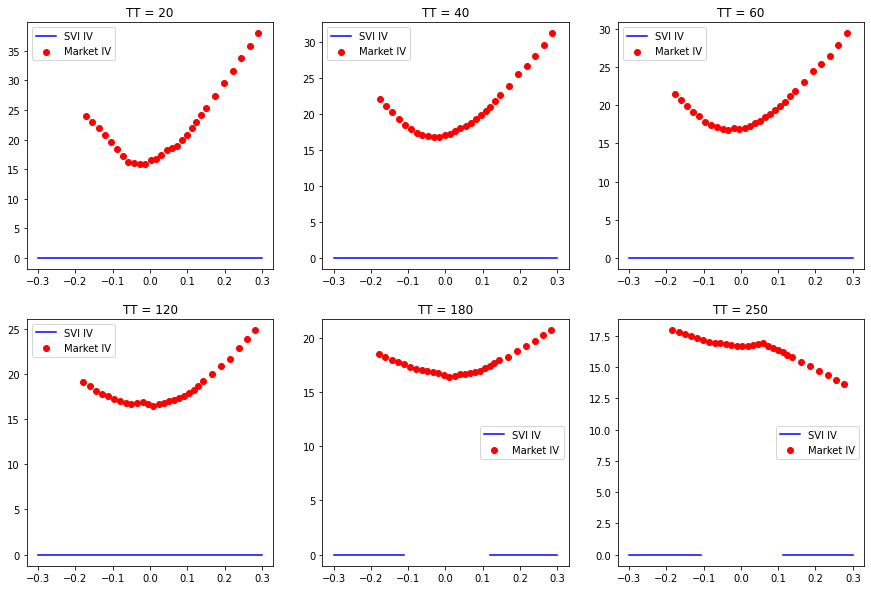

[[ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [-0.99566123 -0.14729679  0.00271657  0.00422991 -0.01060292]
 [-0.99615038 -0.14400032  0.00274644  0.00410048 -0.01071677]]


<ipython-input-32-333eee7aeec9>:32: RuntimeWarning: invalid value encountered in sqrt
  f = lambda x: np.sqrt(np.maximum(p[i, 0] + p[i, 1] * (p[i, 2] * (x - p[i, 3]) + np.sqrt((x - p[i, 3]) ** 2 + p[i, 4])), 0)) / np.sqrt(TT[i] / 365)


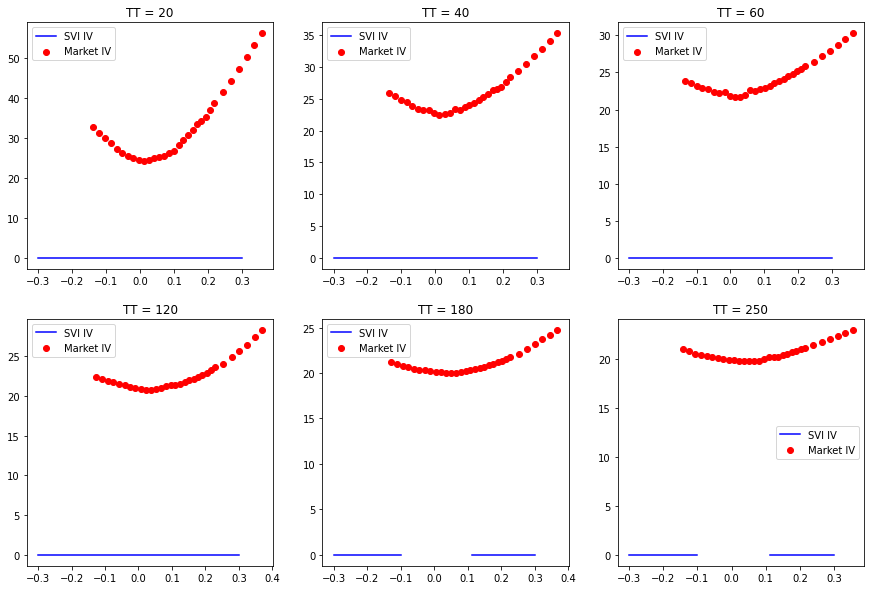

[[ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [-0.99555299 -0.14801977  0.0027138   0.00423917 -0.01054004]
 [-0.99603275 -0.14480318  0.00274257  0.00411646 -0.01065579]]


<ipython-input-32-333eee7aeec9>:32: RuntimeWarning: invalid value encountered in sqrt
  f = lambda x: np.sqrt(np.maximum(p[i, 0] + p[i, 1] * (p[i, 2] * (x - p[i, 3]) + np.sqrt((x - p[i, 3]) ** 2 + p[i, 4])), 0)) / np.sqrt(TT[i] / 365)


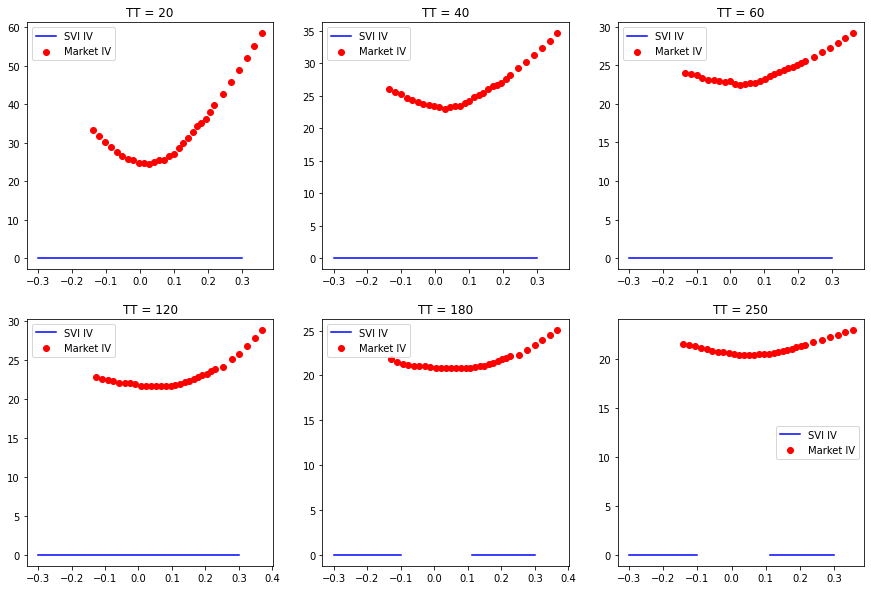

[[ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [-0.99841093 -0.1276201   0.00299902  0.00297115 -0.01164684]
 [-0.99840392 -0.12767312  0.00301813  0.0028787  -0.01165329]]


<ipython-input-32-333eee7aeec9>:32: RuntimeWarning: invalid value encountered in sqrt
  f = lambda x: np.sqrt(np.maximum(p[i, 0] + p[i, 1] * (p[i, 2] * (x - p[i, 3]) + np.sqrt((x - p[i, 3]) ** 2 + p[i, 4])), 0)) / np.sqrt(TT[i] / 365)


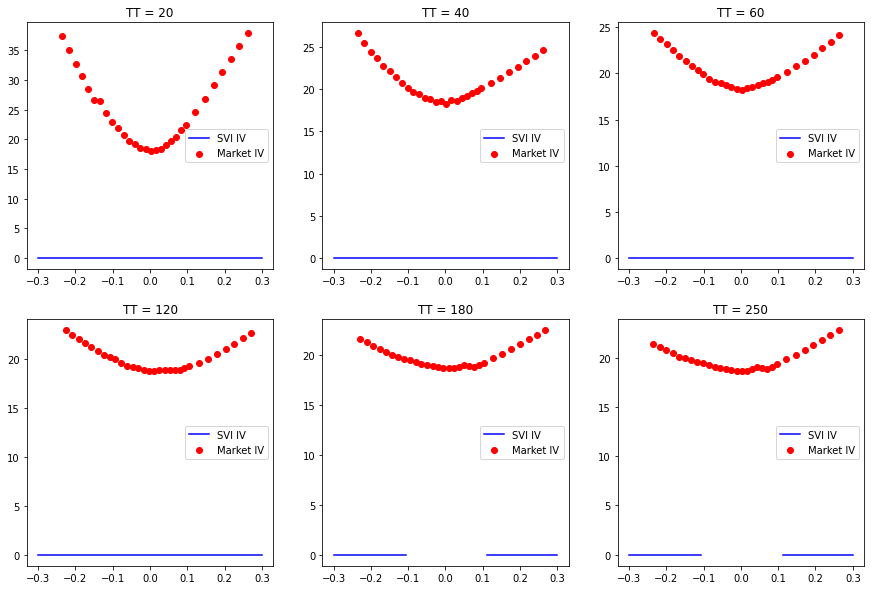

[[ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [-0.99843198 -0.127458    0.00300175  0.00295996 -0.01165258]
 [-0.9984421  -0.12737816  0.0030218   0.00286297 -0.0116709 ]]


<ipython-input-32-333eee7aeec9>:32: RuntimeWarning: invalid value encountered in sqrt
  f = lambda x: np.sqrt(np.maximum(p[i, 0] + p[i, 1] * (p[i, 2] * (x - p[i, 3]) + np.sqrt((x - p[i, 3]) ** 2 + p[i, 4])), 0)) / np.sqrt(TT[i] / 365)


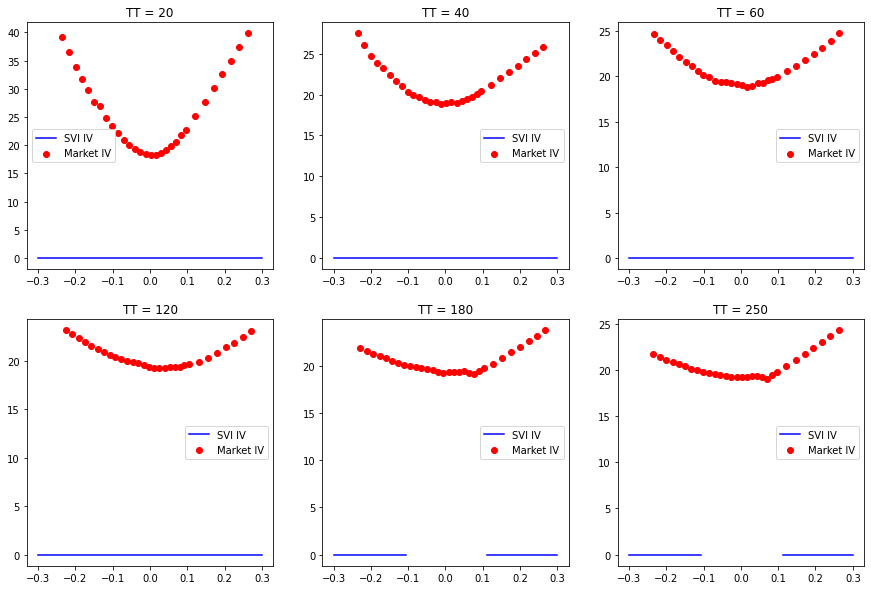

[[ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [-0.99891067 -0.12371136  0.00294944  0.00325913 -0.01180458]
 [-0.99875724 -0.12493392  0.00295861  0.0032211  -0.01167287]]


<ipython-input-32-333eee7aeec9>:32: RuntimeWarning: invalid value encountered in sqrt
  f = lambda x: np.sqrt(np.maximum(p[i, 0] + p[i, 1] * (p[i, 2] * (x - p[i, 3]) + np.sqrt((x - p[i, 3]) ** 2 + p[i, 4])), 0)) / np.sqrt(TT[i] / 365)


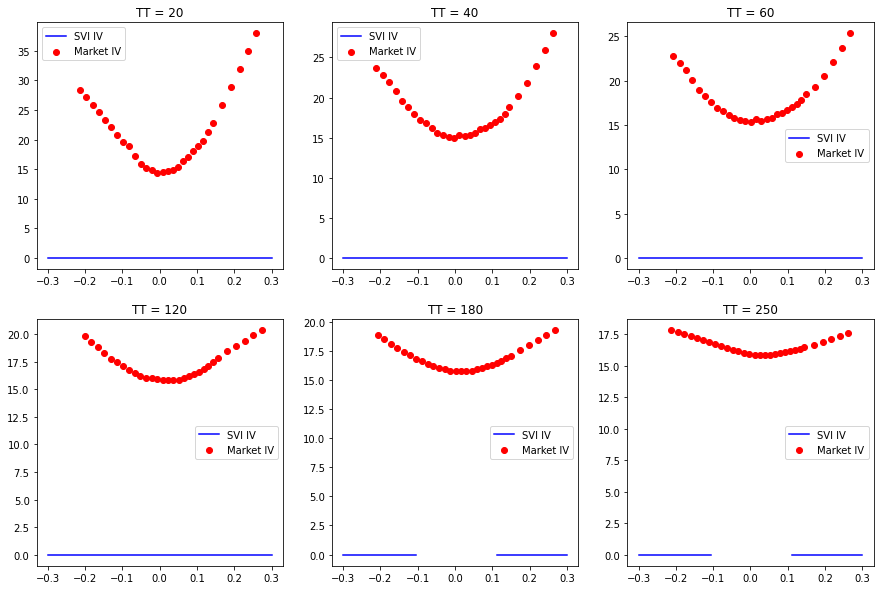

[[ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [-0.99879835 -0.12460529  0.00294407  0.00328441 -0.01172658]
 [-0.99874687 -0.1250168   0.0029574   0.00323245 -0.01165778]]


<ipython-input-32-333eee7aeec9>:32: RuntimeWarning: invalid value encountered in sqrt
  f = lambda x: np.sqrt(np.maximum(p[i, 0] + p[i, 1] * (p[i, 2] * (x - p[i, 3]) + np.sqrt((x - p[i, 3]) ** 2 + p[i, 4])), 0)) / np.sqrt(TT[i] / 365)


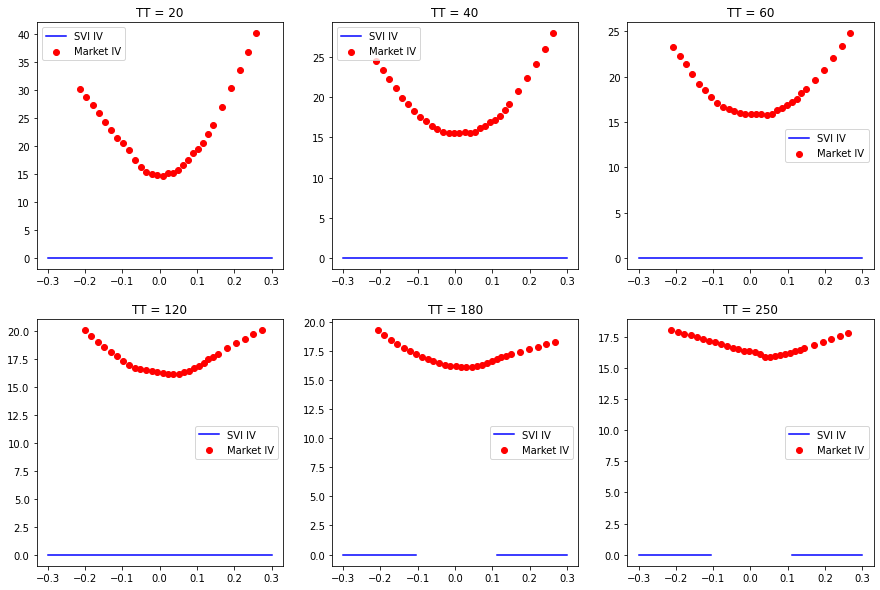

FileNotFoundError: [Errno 2] No such file or directory: './subplot_20231229_buy.jpg/波动率曲面.xlsx'

In [32]:
for sub in dirs:
    data = pd.read_excel(f'./{sub}/波动率曲面.xlsx')
    S = dataarr[1: ,2]
    dataarr = data.values
    K = dataarr[0,3:] #行权价格
    #TT = [workdays(sub.split('_')[0],i) for i in data.iloc[1:, 1]]
    TT = [20,40,60,120,180,250]
    S = dataarr[1: ,2]

    w = np.ones((6, dataarr.shape[1] -3))  # weights for each option, ????weight是啥意思，相当于给每个行权价格的重要性权重
    Vol = np.array(dataarr[1:,3:])#相当于初始的波动率
    p = np.ones((6, 5)) * 0.0 # initial guess for SVI parameters
    p[4:,:] = 0.003#这里为啥要把4行之后的赋值为0.003???????????
    for i in range(6):
        S0 = S[i]
        fun = lambda p: OptSVI1test(i, Vol, w, p, K, S0, TT)
        res = minimize(fun, p[i,:], options={'maxiter': 1000})
        p[i,:] = res.x

    print(p)

    # Vol (a list)                  : implied volatilities in market
    # w (a list)                    : weights
    # p (a list)                    : SVI parameters
    # K (a list)                    : exercise prices
    # S (a float)                   : initial asset price
    # TT (a list)                   : Expiry time

    fig, ax = plt.subplots(2, 3, figsize=(15, 10))  # 创建一个2x3的子图网格
    for i in range(6):
        S0 = S[i]
        f = lambda x: np.sqrt(np.maximum(p[i, 0] + p[i, 1] * (p[i, 2] * (x - p[i, 3]) + np.sqrt((x - p[i, 3]) ** 2 + p[i, 4])), 0)) / np.sqrt(TT[i] / 365)
        x = np.linspace(-0.3, 0.3, 100)
        ax[i//3, i%3].plot(x, f(x),label = 'SVI IV', color='b')  # 选择子图
        ImpVol = Vol[i,:]
        x = np.array(K / S0).astype(float)
        ax[i//3, i%3].scatter(np.log(x), ImpVol,label='Market IV',color='r')
        ax[i//3, i%3].set_title('TT = %d' % TT[i])
        ax[i//3, i%3].legend()


    plt.show()
    fig.savefig(f'subplot_{sub}.jpg')  # 保存整个子图网格为一个jpg文件

In [46]:
S[i]

3462.097

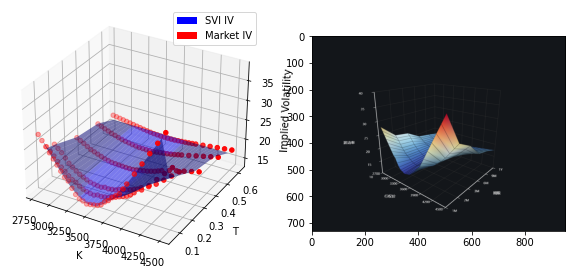

In [37]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.image import imread

# Create a figure with two subplots, one of which is a 3D plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

Z = []
for i in range(6):
    f = lambda x: np.sqrt(np.maximum(p[i, 0] + p[i, 1] * (p[i, 2] * (x - p[i, 3]) + np.sqrt((x - p[i, 3]) ** 2 + p[i, 4])), 0)) / np.sqrt(TT[i] / 365)
    x = (np.arange(2800, 4500, 50) / S0)
    Z.append(f(np.log(x)))

X, Y = np.meshgrid(np.arange(2800, 4500, 50),np.array(TT) / 365)
ax.plot_surface(X, Y, np.array(Z), alpha=0.5, color='blue')

xx = np.array(TT) / 365
ax.scatter(K, np.ones(len(K))*xx[0], Vol[0,:], color='red')
ax.scatter(K, np.ones(len(K))*xx[1], Vol[1,:], color='red')
ax.scatter(K, np.ones(len(K))*xx[2], Vol[2,:], color='red')
ax.scatter(K, np.ones(len(K))*xx[3], Vol[3,:], color='red')
ax.scatter(K, np.ones(len(K))*xx[4], Vol[4,:], color='red')
ax.scatter(K, np.ones(len(K))*xx[5], Vol[5,:], color='red')

ax.set_xlabel('K')
ax.set_ylabel('T')
ax.set_zlabel('Implied Volatility')

legend_elements = [Patch(facecolor='blue', label='SVI IV'),
                   Patch(facecolor='red', label='Market IV')]
ax.legend(handles=legend_elements)

# Load image from local file
img = imread(r'.\20240412_buy\\波动率曲面.png')

# Display the image
ax2.imshow(img)

plt.show()